In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
matplotlib.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline

In [ ]:
bike_df = pd.read_csv("/content/london_merged.csv")
bike_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
bike_df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [ ]:
bike_df.shape

(17414, 10)

In [ ]:
# unique values in season
bike_df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [ ]:
# unique values in weather_code
bike_df.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [ ]:
# renaming the column names
new_col_name = {'cnt' : 'count', 't1' : 'actual_temp', 't2' : 'feels_like', 'hum' : 'humidity_percent',
                'wind_speed' : 'wind_speed_kph', 'weather_code' : 'weather', 'is_holiday' : 'is_holiday', 'is_weekend' : 'is_weekend', 'season' : 'season'}

bike_df.rename(new_col_name, axis = 1, inplace = True)

In [ ]:
bike_df.head()

,timestamp,count,actual_temp,feels_like,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
# changing humidity to values between 0 and 1
bike_df.humidity_percent = bike_df.humidity_percent/100

In [ ]:
# dictionary to represent what a number in season mean
season_dict = {'0.0' : 'spring',
               '1.0' : 'summer',
               '2.0' : 'autumn',
               '3.0' : 'winter'
               }

weather_dict = {'1.0' : 'clear',
                '2.0' : 'scattered clouds',
                '3.0' : 'Broken Clouds',
                '4.0' : 'Cloudy',
                '7.0' : 'Rain',
                '10.0' : 'Rain with thunderstorm',
                '26.0' : 'Snowfall'
                }

bike_df.season = bike_df.season.astype('str')
bike_df.season = bike_df.season.map(season_dict)

bike_df.weather = bike_df.weather.astype('str')
bike_df.weather = bike_df.weather.map(weather_dict)

In [ ]:
bike_df.head()

,timestamp,count,actual_temp,feels_like,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken Clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,clear,0.0,1.0,winter


In [16]:
# Total number of new bike shares
bike_df['count'].sum()

19905972

<ipython-input-23-cf00806b29ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = bike_df.corr(method = 'pearson')


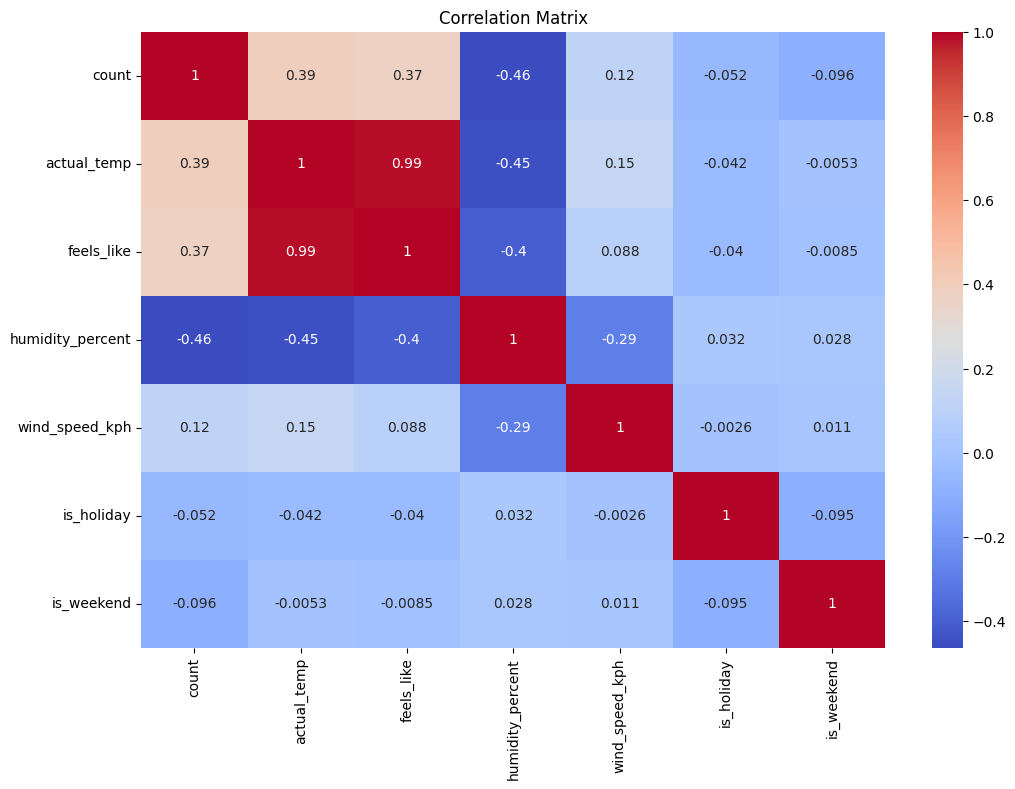

In [23]:
corr_mat = bike_df.corr(method = 'pearson')
sb.heatmap(corr_mat, cmap = 'coolwarm', annot = True)
plt.title("Correlation Matrix")
plt.show()

In [25]:
bike_df['timestamp'] = pd.to_datetime(bike_df['timestamp'])
bike_df['date'] = bike_df['timestamp'].dt.date
bike_df.head()

,timestamp,count,actual_temp,feels_like,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,date
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken Clouds,0.0,1.0,winter,2015-01-04
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,clear,0.0,1.0,winter,2015-01-04
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,clear,0.0,1.0,winter,2015-01-04
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,clear,0.0,1.0,winter,2015-01-04
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,clear,0.0,1.0,winter,2015-01-04


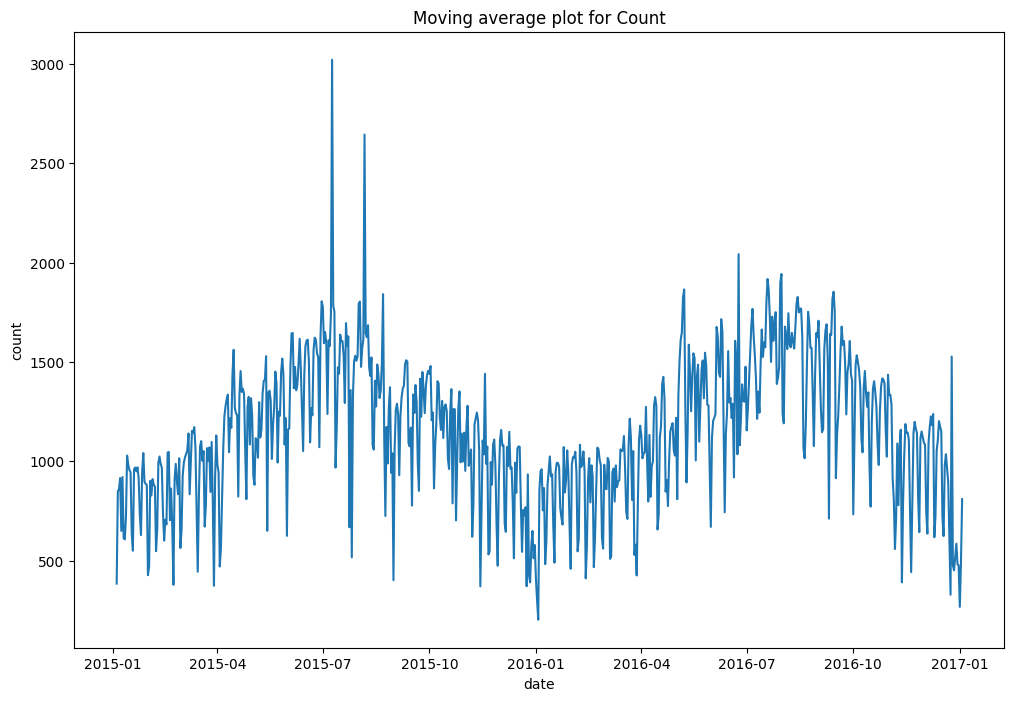

In [48]:
# Moving Average by 3 consecutive days

daily_avg = bike_df.groupby('date')['count'].mean()
window_size = 3 # since it is grouped by date: 3 consecutive days
moving_avg = daily_avg.rolling(window = window_size).mean()

plt.plot(daily_avg.index, daily_avg)
plt.title('Moving average plot for Count')
plt.xlabel('date')
plt.ylabel('count')
plt.show()

In [30]:
bike_df

,timestamp,count,actual_temp,feels_like,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,date
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken Clouds,0.0,1.0,winter,2015-01-04
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,clear,0.0,1.0,winter,2015-01-04
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,clear,0.0,1.0,winter,2015-01-04
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,clear,0.0,1.0,winter,2015-01-04
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,clear,0.0,1.0,winter,2015-01-04
...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken Clouds,0.0,0.0,winter,2017-01-03
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,winter,2017-01-03
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,winter,2017-01-03
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,winter,2017-01-03


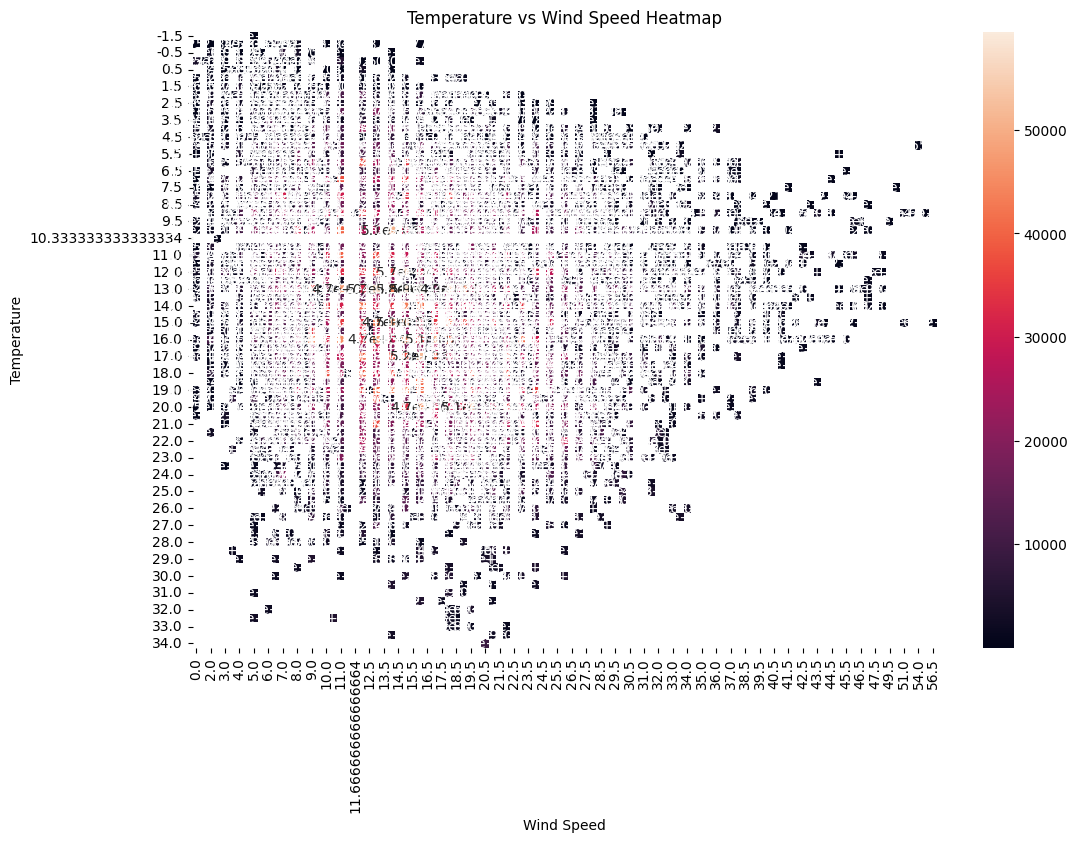

In [33]:
heatmap_data = bike_df[['actual_temp', 'wind_speed_kph', 'count']].pivot_table(values = 'count', index = 'actual_temp', columns = 'wind_speed_kph', aggfunc = 'sum')
sb.heatmap(heatmap_data, annot = True)
plt.title('Temperature vs Wind Speed Heatmap')
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.show()

In [34]:
bike_df['hour'] = bike_df['timestamp'].dt.time
bike_df.head()

,timestamp,count,actual_temp,feels_like,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,date,hour
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken Clouds,0.0,1.0,winter,2015-01-04,00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,clear,0.0,1.0,winter,2015-01-04,01:00:00
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,clear,0.0,1.0,winter,2015-01-04,02:00:00
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,clear,0.0,1.0,winter,2015-01-04,03:00:00
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,clear,0.0,1.0,winter,2015-01-04,04:00:00


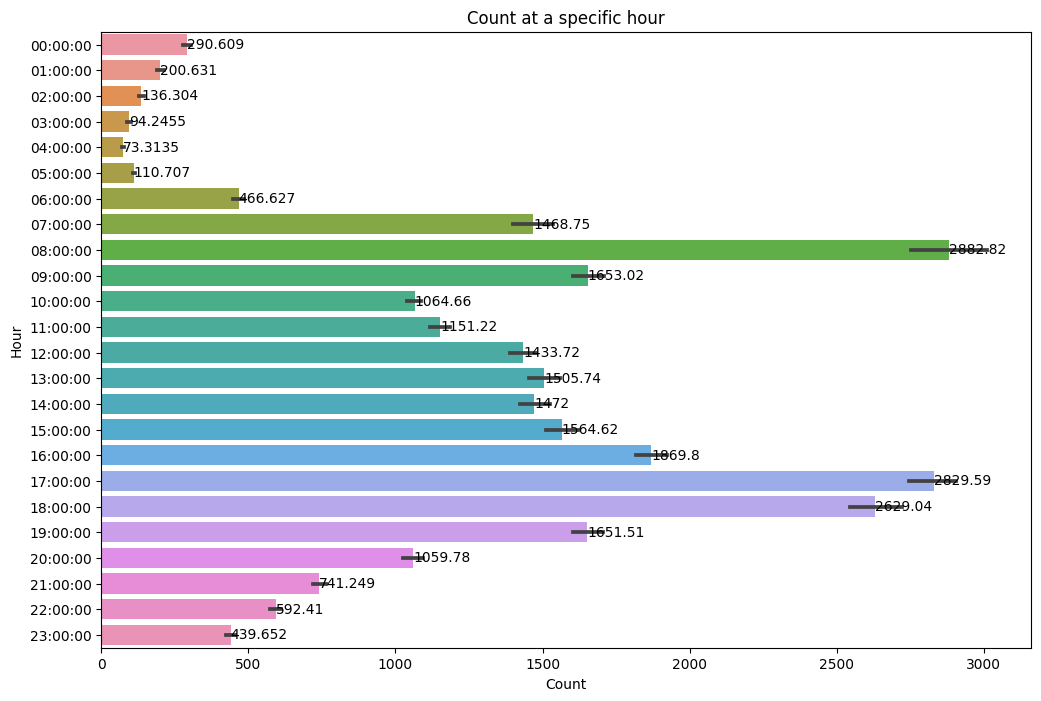

In [38]:
ax = sb.barplot(x = 'count', y = 'hour', data = bike_df)

for i in ax.containers:
  ax.bar_label(i, )

plt.title('Count at a specific hour')
plt.xlabel('Count')
plt.ylabel('Hour')
plt.show()

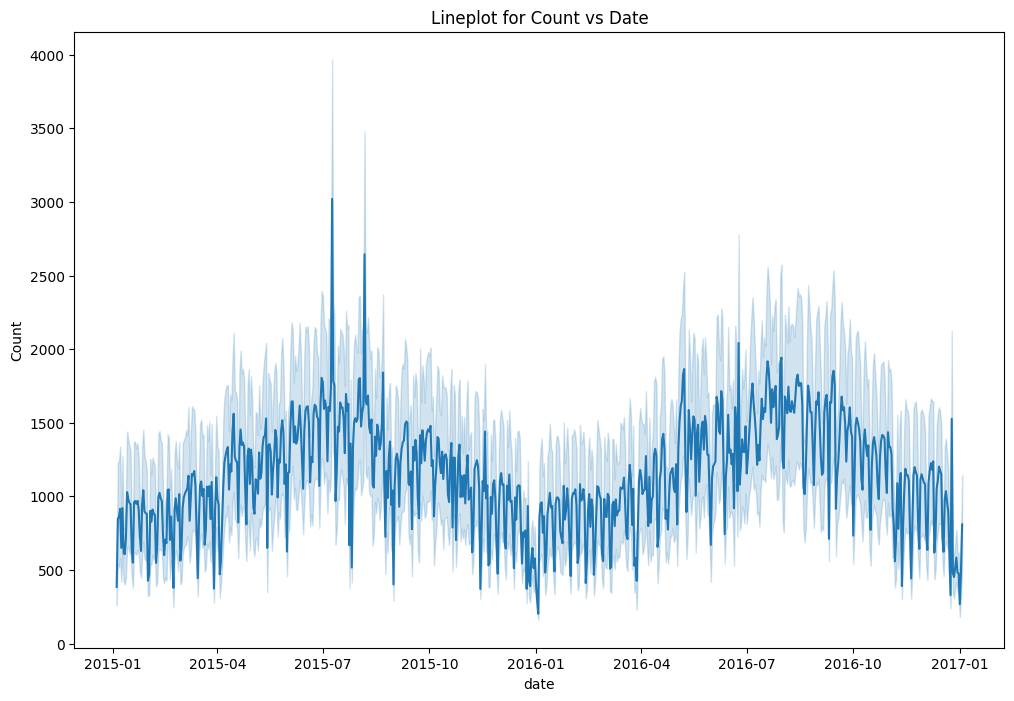

In [47]:
sb.lineplot(x='date', y='count', data=bike_df)
plt.title('Lineplot for Count vs Date')
plt.xlabel('date')
plt.ylabel('Count')
plt.show()

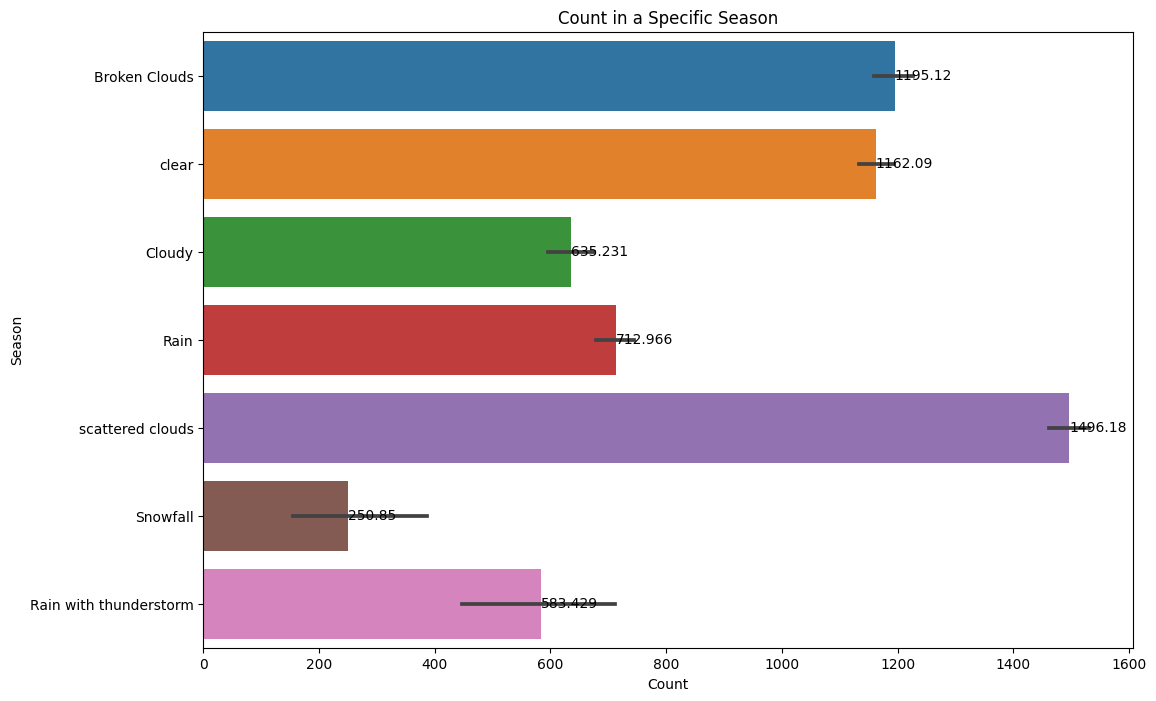

In [39]:
ax1 = sb.barplot(x = 'count', y = 'weather', data = bike_df)

for i in ax1.containers:
  ax1.bar_label(i, )

plt.title('Count in a Specific Season')
plt.xlabel('Count')
plt.ylabel('Season')
plt.show()

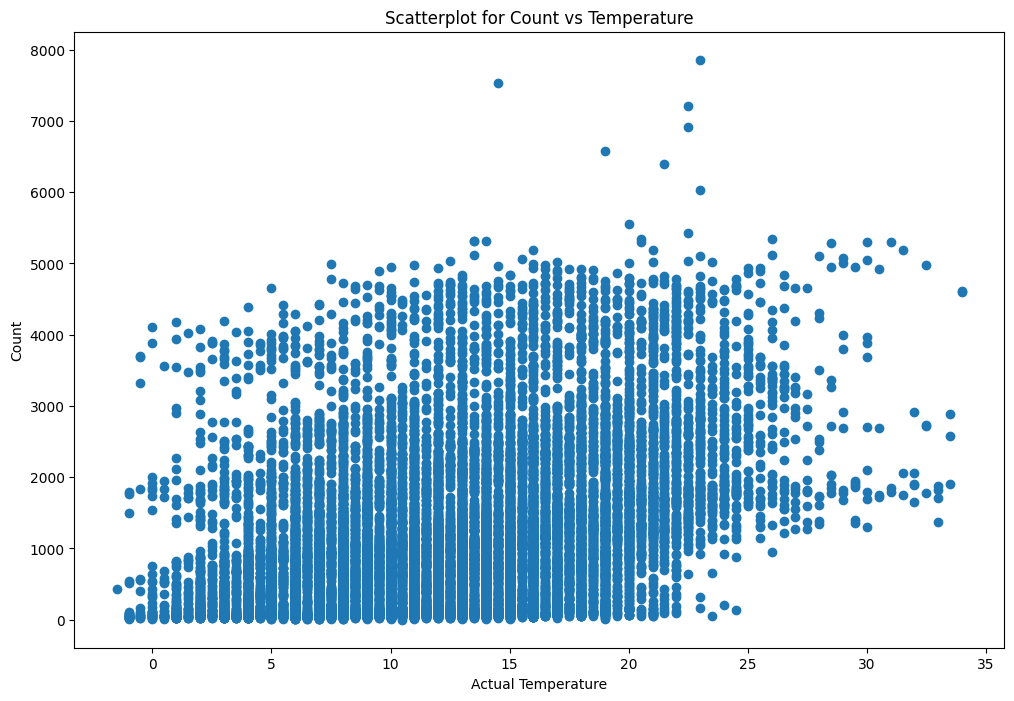

In [40]:
plt.scatter(x = bike_df['actual_temp'], y = bike_df['count'])
plt.title('Scatterplot for Count vs Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Count')
plt.show()

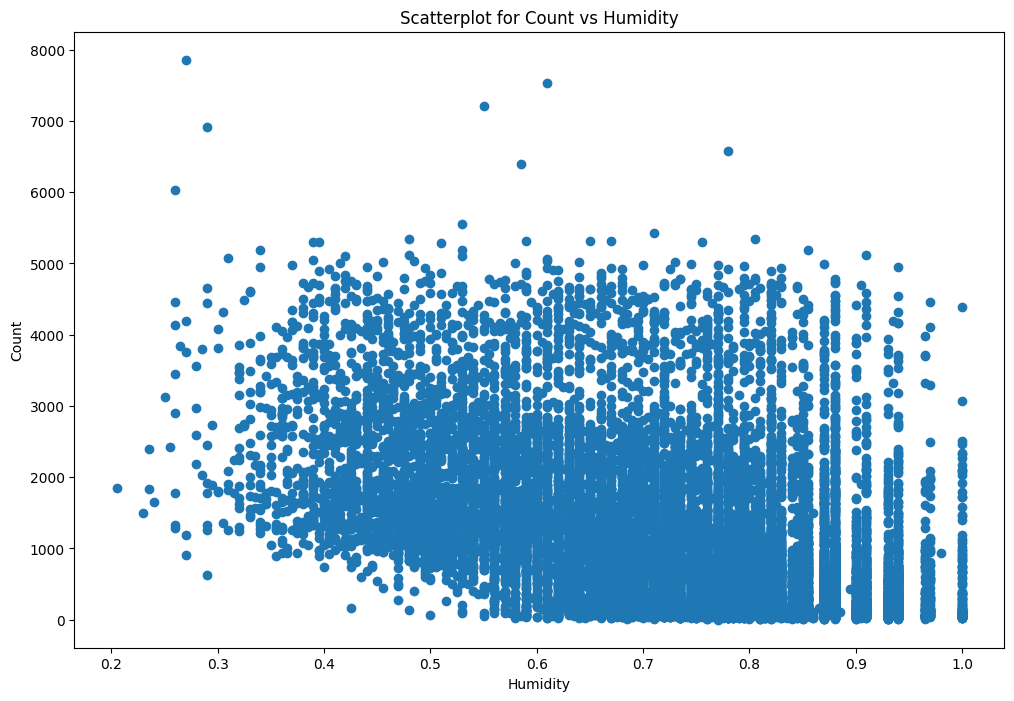

In [41]:
plt.scatter(x = bike_df['humidity_percent'], y = bike_df['count'])
plt.title('Scatterplot for Count vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

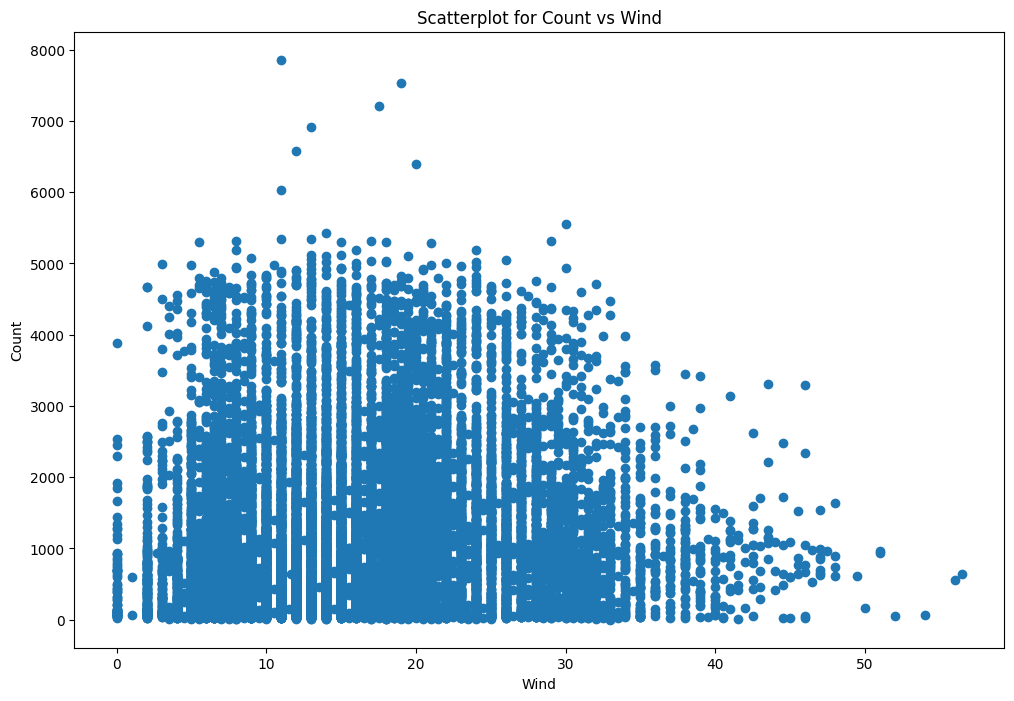

In [42]:
plt.scatter(x = bike_df['wind_speed_kph'], y = bike_df['count'])
plt.title('Scatterplot for Count vs Wind')
plt.xlabel('Wind')
plt.ylabel('Count')
plt.show()

<ipython-input-43-e5352f37e098>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bike_df.corr()


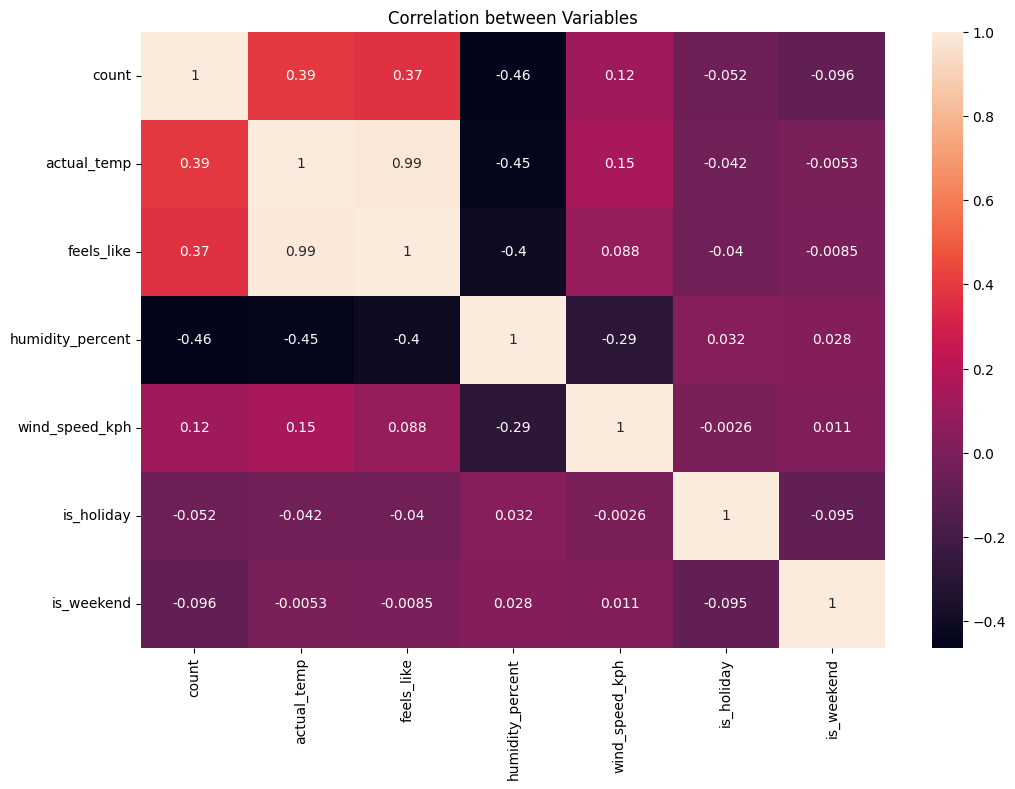

In [43]:
correlation_matrix = bike_df.corr()
sb.heatmap(correlation_matrix, annot = True)
plt.title('Correlation between Variables')
plt.show()

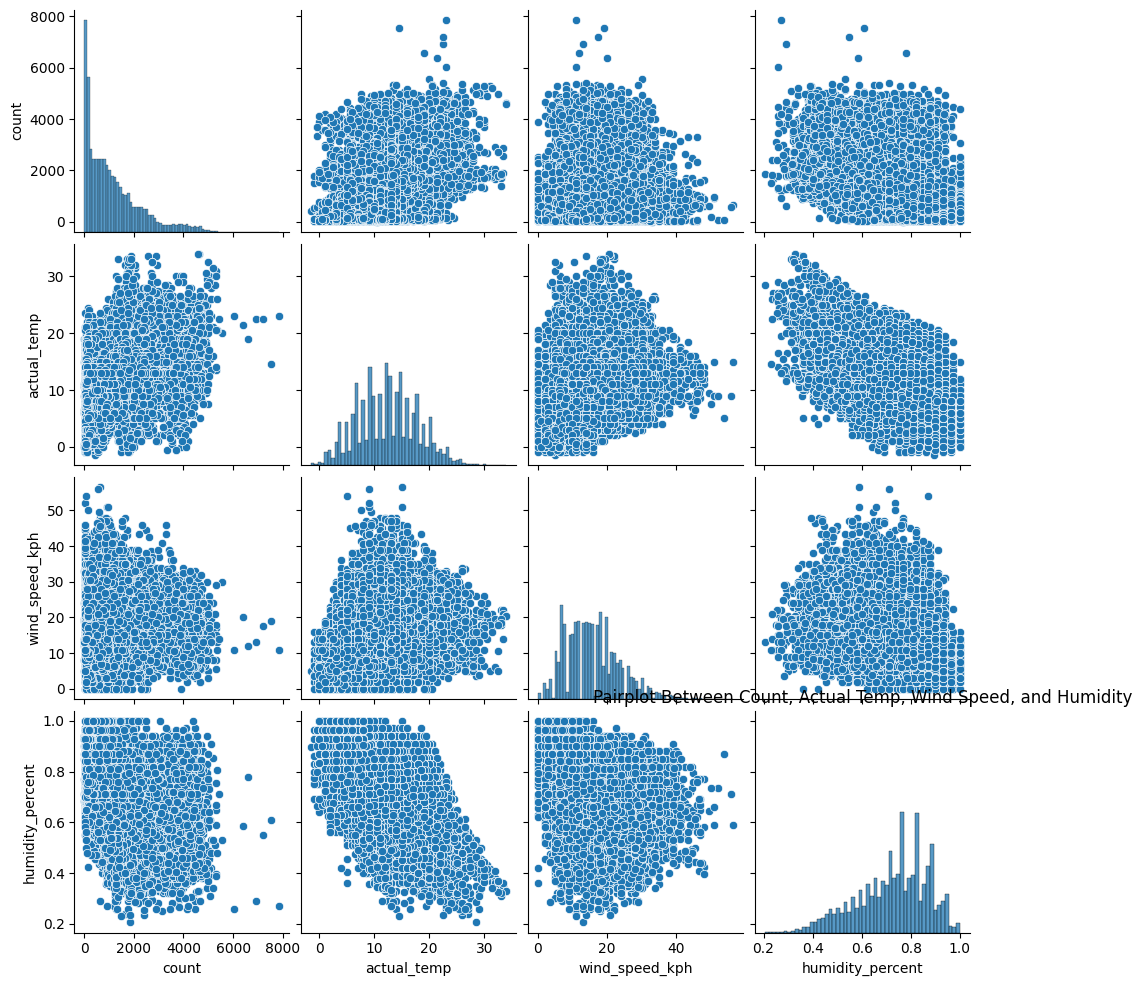

In [44]:
sb.pairplot(bike_df[['count', 'actual_temp', 'wind_speed_kph', 'humidity_percent']])
plt.title('Pairplot Between Count, Actual Temp, Wind Speed, and Humidity')
plt.show()

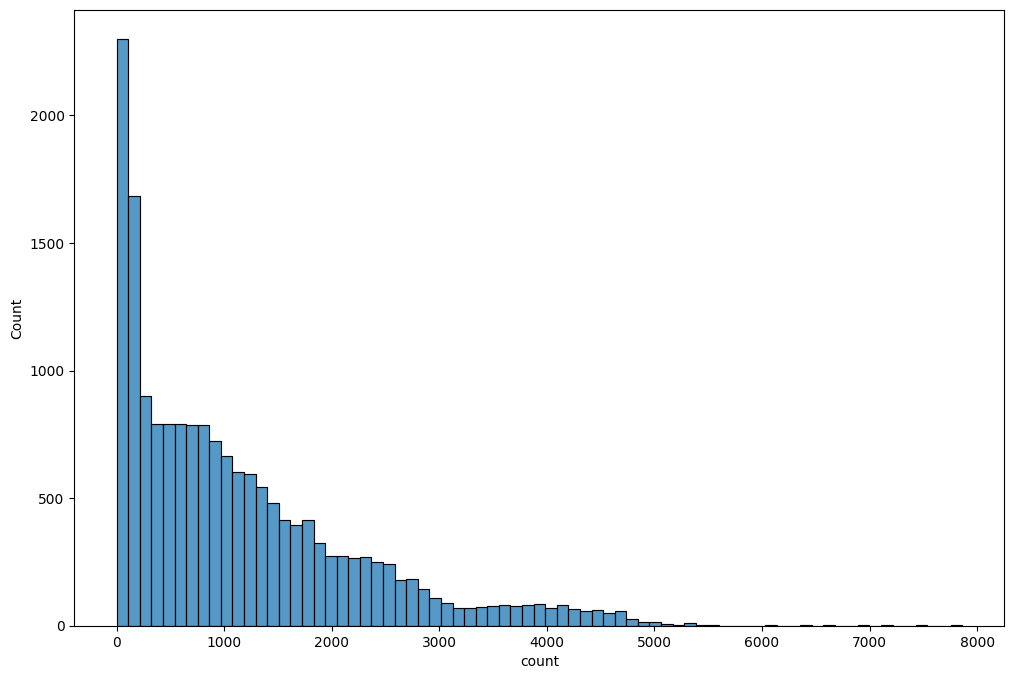

In [45]:
sb.histplot(bike_df['count'])
plt.show()